In [1]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('omni_result_puretext.txt',sep='\s+',names=['year','doy','hour','minute','B','V','Np','MA'])
# data = data[:30]

In [3]:
data[:5]

,year,doy,hour,minute,B,V,Np,MA
0,1999,117,3,23,9.24,360.8,0.22,0.9
1,1999,117,4,17,9.32,350.5,0.20,0.8
2,1999,117,5,43,9.43,358.5,0.22,0.9
3,1999,117,5,44,9.45,361.3,0.22,0.9
4,1999,131,14,28,6.28,359.8,0.09,0.9


In [4]:
case_list = []
log_list = []

In [5]:
%%time
for i, line in data.iterrows():
    t = datetime.datetime(int(line['year']),1,1,int(line['hour']),int(line['minute']))+datetime.timedelta(days=int(line['doy'])-1)
    if not case_list:
        last = t
        case_list.append([t,])
        log_list.append(1)
    else:
        if t - last < datetime.timedelta(0,300):
            if len(case_list[-1]) == 1:
                case_list[-1].append(t)
                log_list[-1] += 1
            elif len(case_list[-1]) == 2:
                case_list[-1][1] = t
                log_list[-1] += 1
        else:
            case_list.append([t,])
            log_list.append(1)
        last = t
#     break

CPU times: user 170 ms, sys: 2.89 ms, total: 173 ms
Wall time: 177 ms


In [6]:
MIN_DURATION = 5
MIN_FILL_RATE = 0.7

In [7]:
num_of_streams = 1
duration_list = []
numOfLog_list = []
start_list = []
end_list = []
for i,case in enumerate(case_list):
    if len(case) == 2:
        total_mins = ((case[1]-case[0]).seconds//60+1)
        fill_rate = log_list[i] / total_mins
        if total_mins > MIN_DURATION and fill_rate > MIN_FILL_RATE:
            print(f'{num_of_streams}: {str(case[0])} -- {str(case[1])}\t{log_list[i]}/{total_mins}\t{fill_rate}')
            num_of_streams += 1
            duration_list.append(total_mins)
            start_list.append(case[0])
            end_list.append(case[1])
            numOfLog_list.append(log_list[i])
#     break

1: 1999-05-11 18:25:00 -- 1999-05-11 18:57:00	26/33	0.7878787878787878
2: 2000-03-29 04:45:00 -- 2000-03-29 05:12:00	25/28	0.8928571428571429
3: 2002-03-20 04:17:00 -- 2002-03-20 04:56:00	30/40	0.75
4: 2002-03-20 05:01:00 -- 2002-03-20 05:11:00	8/11	0.7272727272727273
5: 2002-03-20 05:29:00 -- 2002-03-20 06:00:00	28/32	0.875
6: 2002-03-20 09:47:00 -- 2002-03-20 09:58:00	12/12	1.0
7: 2002-03-20 12:25:00 -- 2002-03-20 13:44:00	70/80	0.875
8: 2002-05-24 15:56:00 -- 2002-05-24 17:10:00	62/75	0.8266666666666667
9: 2002-05-24 17:16:00 -- 2002-05-24 18:16:00	51/61	0.8360655737704918
10: 2002-05-24 18:28:00 -- 2002-05-24 18:34:00	5/7	0.7142857142857143
11: 2002-05-24 18:40:00 -- 2002-05-24 19:01:00	19/22	0.8636363636363636
12: 2002-05-24 19:28:00 -- 2002-05-24 20:24:00	44/57	0.7719298245614035
13: 2002-05-24 20:30:00 -- 2002-05-24 20:49:00	16/20	0.8
14: 2002-05-24 22:15:00 -- 2002-05-24 22:36:00	17/22	0.7727272727272727
15: 2002-05-24 22:47:00 -- 2002-05-24 23:19:00	29/33	0.8787878787878788
16

In [8]:
summary_dict = {}
summary_dict['start'] = start_list
summary_dict['end'] = end_list
summary_dict['duration'] = duration_list
summary_dict['num_of_log'] = numOfLog_list
summary_df = pd.DataFrame(summary_dict)

In [9]:
summary_df['fill_rate'] = np.array(summary_dict['num_of_log']) / np.array(summary_dict['duration'])
summary_df

,start,end,duration,num_of_log,fill_rate
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857
2,2002-03-20 04:17:00,2002-03-20 04:56:00,40,30,0.750000
3,2002-03-20 05:01:00,2002-03-20 05:11:00,11,8,0.727273
4,2002-03-20 05:29:00,2002-03-20 06:00:00,32,28,0.875000
5,2002-03-20 09:47:00,2002-03-20 09:58:00,12,12,1.000000
6,2002-03-20 12:25:00,2002-03-20 13:44:00,80,70,0.875000
7,2002-05-24 15:56:00,2002-05-24 17:10:00,75,62,0.826667
8,2002-05-24 17:16:00,2002-05-24 18:16:00,61,51,0.836066
9,2002-05-24 18:28:00,2002-05-24 18:34:00,7,5,0.714286


In [17]:
summary_df.to_pickle('selected_events.pkl')

In [18]:
read_test = pd.read_pickle('selected_events.pkl')

In [19]:
read_test

,start,end,duration,num_of_log,fill_rate
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857
2,2002-03-20 04:17:00,2002-03-20 04:56:00,40,30,0.750000
3,2002-03-20 05:01:00,2002-03-20 05:11:00,11,8,0.727273
4,2002-03-20 05:29:00,2002-03-20 06:00:00,32,28,0.875000
5,2002-03-20 09:47:00,2002-03-20 09:58:00,12,12,1.000000
6,2002-03-20 12:25:00,2002-03-20 13:44:00,80,70,0.875000
7,2002-05-24 15:56:00,2002-05-24 17:10:00,75,62,0.826667
8,2002-05-24 17:16:00,2002-05-24 18:16:00,61,51,0.836066
9,2002-05-24 18:28:00,2002-05-24 18:34:00,7,5,0.714286


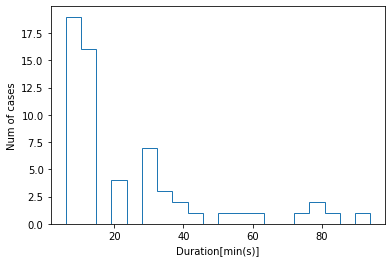

In [10]:
# fig = plt.figure(figsize=(10,4))
plt.hist(duration_list,bins=20,histtype='step')
plt.xlabel('Duration[min(s)]')
plt.ylabel('Num of cases');

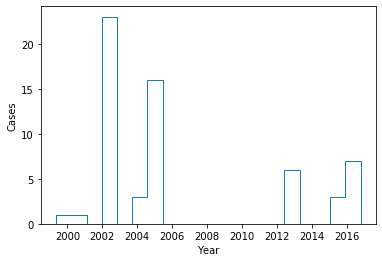

In [50]:
plt.hist(summary_df.start,bins=20,histtype='step')
plt.xlabel('Year')
plt.ylabel('Cases');

In [73]:
year_list = [1999+i for i in range(18)]
total_duration_per_year = [0,]*len(year_list)
doy_each_year = [None,]*len(year_list)
days_per_year = [0,]*len(year_list)

In [74]:
for i,log in summary_df.iterrows():
    year = log.start.year
    index = year - 1999
    total_duration_per_year[index]+=log.duration
    doy = log.start.timetuple().tm_yday
    if not doy_each_year[index]:
        doy_each_year[index] = [doy,]
        days_per_year[index] += 1
    else:
        if doy != doy_each_year[index][-1]:
            doy_each_year[index].append(doy)
            days_per_year[index] += 1
        else:
            pass

In [79]:
print(doy_each_year)
# 做修正
days_per_year[3] = 3
days_per_year[5] = 2
days_per_year[-4] = 1
days_per_year[-1] = 1

[[131], [89], None, [79, 144, 145, 200], [275], [205, 256, 257], None, None, None, None, None, None, None, None, [17, 18], None, [174], [287, 288]]


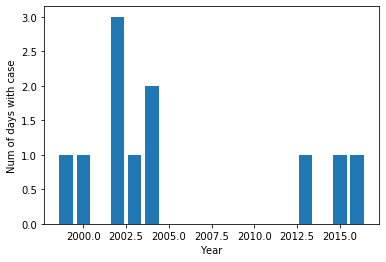

In [80]:
plt.bar(year_list,days_per_year)
plt.xlabel('Year')
plt.ylabel('Num of days with case');

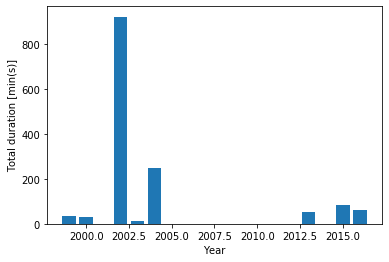

In [59]:
plt.bar(year_list,total_duration_per_year)
plt.xlabel('Year')
plt.ylabel('Total duration [min(s)]');

In [57]:
np.sum(total_duration_per_year)

1440

In [63]:
log.start.timetuple().tm_yday

288